This project consists of twitter's tweets data, tweets done by people from across the globe at the time of U.S. elections to analyse whether people are positive towards Donald Trump winning the elections or Joe Biden and to predict as to who will win. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #when using textual data(, - emoji # @ *)- this removes these signs which does not have any meaning 
import nltk #remove stopwords (and, or, is, the)- these words does not tell any important meaning
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from wordcloud import wordcloud

In [3]:
from textblob import TextBlob #tokenisation - breaking cleaned sentences into words
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *

In [4]:
from nltk.corpus import wordnet

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HARSEES
[nltk_data]     KAUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
trump =pd.read_csv("hashtag_donaldtrump.csv",lineterminator='\n')

In [8]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [9]:
biden=pd.read_csv("hashtag_joebiden.csv",lineterminator='\n')

In [10]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [11]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


interpretation- for trump people are writing more, it can be bad as well as good!

In [12]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [13]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [14]:
#to combine both the datasets for easier data cleaning & to differentiate later

In [15]:
trump['candidate']='trump'

In [16]:
biden['candidate']='biden'

In [17]:
data=pd.concat([trump,biden])
data

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,...,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547,biden
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617,biden
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,...,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335,biden
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,...,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846,biden


In [18]:
data.shape

(1747805, 22)

In [19]:
#sorting values by created date to see the how the thought process of people changed over time for eg. initially positive towards trump then over time they got negetive 
data.sort_values(by="created_at")

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,trump
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,biden
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,trump
970918,2020-11-08 23:59:55,1.325589e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,Twitter Web App,4.519791e+08,Dunken K Bliths,DunkenKBliths,"""Tesla owner's will be followed back""\n\n#Mach...",...,✔ Official Twitter Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.807500,trump
922910,2020-11-08 23:59:56,1.325589e+18,@nbcbayarea Who doesn’t like dogs or any kind ...,1.0,1.0,Twitter for iPhone,1.182639e+08,Dianna Maria,DiannaMaria,"~ I am a very proud mom of a sweet, kind and c...",...,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,2020-11-09 17:46:06.939099,trump
737089,2020-11-08 23:59:57,1.325589e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,Twitter for iPhone,1.148479e+08,Nataša,PewPeeew,My brain consists of coping mechanisms and vin...,...,Deutschland,51.083420,10.423447,NaN,Germany,Europe,NaN,NaN,2020-11-09 18:26:04.550843,biden


EDA

<AxesSubplot:xlabel='candidate'>

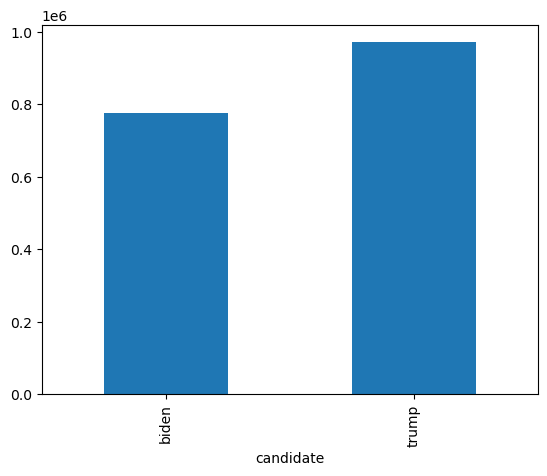

In [20]:
#no. of tweets received for each of them 
data.groupby('candidate')['tweet'].count().plot.bar()

<AxesSubplot:xlabel='candidate'>

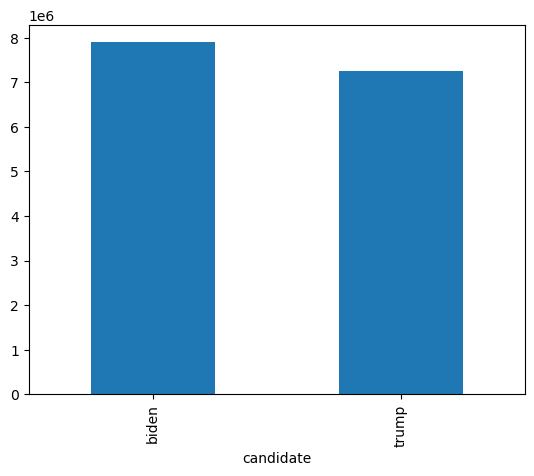

In [21]:
#comparison plot of likes 
data.groupby('candidate')['likes'].sum().plot.bar()

Interpretation - People are tweeting/talking more abouttrump but biden has the most no. of likes 

In [22]:
data.country.value_counts()

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 189, dtype: int64

Interpretation - USA is talking the most about the elections 

In [23]:
data['country']=data['country'].replace({'United States of America':"US",'United States':"US"})

In [24]:
#tweets for biden and trump from each country
top10countries = data.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
top10countries

['US',
 'United Kingdom',
 'India',
 'Germany',
 'France',
 'Canada',
 'Italy',
 'Australia',
 'Mexico',
 'Turkey']

In [25]:
tweet_df=data.groupby(['country','candidate'])['tweet'].count().reset_index()
tweet_df

,country,candidate,tweet
0,Afghanistan,biden,119
1,Afghanistan,trump,101
2,Albania,biden,61
3,Albania,trump,74
4,Algeria,biden,24
...,...,...,...
363,Yemen,trump,93
364,Zambia,biden,33
365,Zambia,trump,38
366,Zimbabwe,biden,59


In [26]:
##
tweeters = tweet_df[tweet_df['country'].isin(top10countries)]
tweeters

,country,candidate,tweet
16,Australia,biden,5534
17,Australia,trump,9365
54,Canada,biden,10809
55,Canada,trump,16996
112,France,biden,14610
113,France,trump,20689
118,Germany,biden,12761
119,Germany,trump,22618
146,India,biden,21532
147,India,trump,18559


Interpretation - In india biden was more talked about than trump 

In [27]:
plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

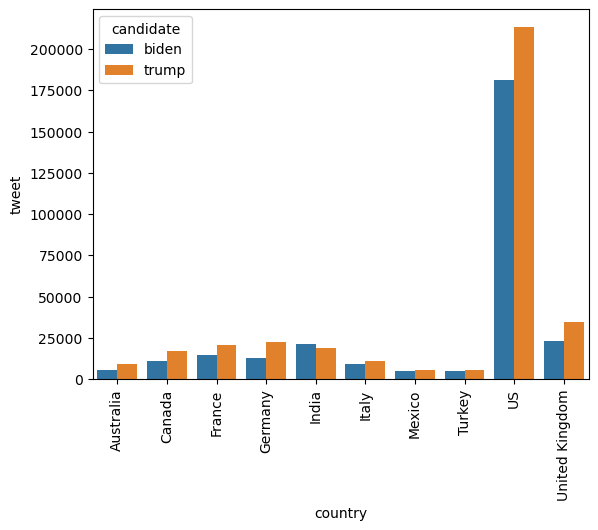

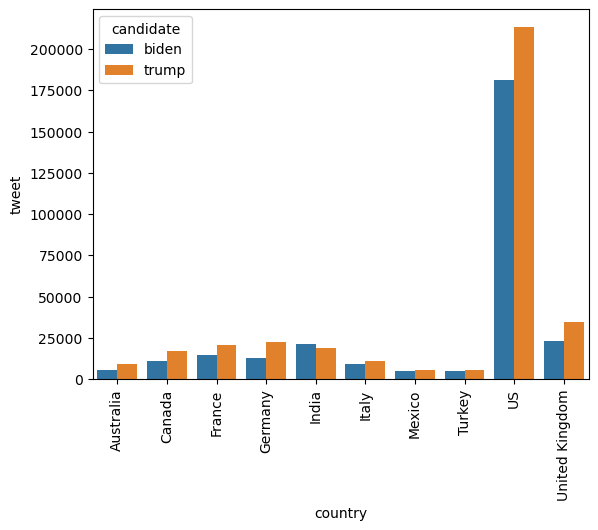

In [59]:
ax = sns.barplot(data=tweeters,x='country',y='tweet',hue='candidate')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure

## Sentiment analysis 

In [30]:
lm = WordNetLemmatizer()

In [31]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text)) #anything other than alphabets a-z replace with space, (^ - not) 
    text = text.split() #split the text into single single words
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text 

## Create a function to get polarity & subjectivity
Polarity - float value that lies between -1 and 1, where 1 means positive sentiment, -1 means negetive sentiment 

Subjectivity - if the sentence is subjective or objective --- tell us --- subjective means sentence refers to a personal opinion and not facts whereas objective means facts 

In [32]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [33]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [34]:
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

## Donald Trump tweet sentiment analysis

In [35]:
trump_tweets = data[data['candidate'] == 'trump']

In [36]:
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US']

In [37]:
trump_tweets = trump_tweets[['tweet']]

In [38]:
trump_tweets

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
2,"#Trump: As a student I used to hear for years,..."
4,You get a tie! And you get a tie! #Trump ‘s ra...
5,@CLady62 Her 15 minutes were over long time ag...
7,@DeeviousDenise @realDonaldTrump @nypost There...
...,...
970893,@DonaldJTrumpJr Being a #tRump you are intimat...
970895,Have you know decency #Trump @GOP? Do you kno...
970897,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...
970900,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...


In [39]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\HARSEES
[nltk_data]     KAUR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
trump_tweets['cleantext']=trump_tweets['tweet'].apply(clean)

In [41]:
trump_tweets 

,tweet,cleantext
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...
...,...,...
970893,@DonaldJTrumpJr Being a #tRump you are intimat...,donaldjtrumpjr trump intimately familiar disgu...
970895,Have you know decency #Trump @GOP? Do you kno...,know decency trump gop know like child die bil...
970897,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,lionz den present white obama get ready live f...
970900,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,trump patriot maga http co fnm ux


In [42]:
trump_tweets['subjectivity']=trump_tweets['cleantext'].apply(getsubjectivity)

In [43]:
trump_tweets.head()

,tweet,cleantext,subjectivity
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh,0.000000
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.533333


In [44]:
trump_tweets['polarity']=trump_tweets['cleantext'].apply(getpolarity)

In [45]:
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh,0.000000,0.000000
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667,-0.108333
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.533333,0.050000


In [46]:
trump_tweets['analysis']=trump_tweets['polarity'].apply(getAnalysis)

In [47]:
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh,0.000000,0.000000,neutral
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667,-0.108333,negative
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.533333,0.050000,positive


Text(0, 0.5, '%age of tweets')

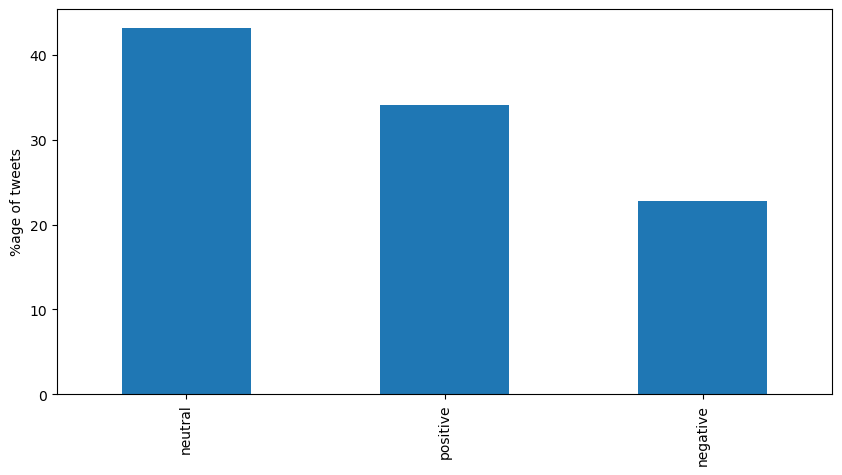

In [48]:
#how much data is positive/negetive/neutral
plt.figure(figsize=(10,5))
(trump_tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")

Interpretation - majorly people are neutral towards trump in the US

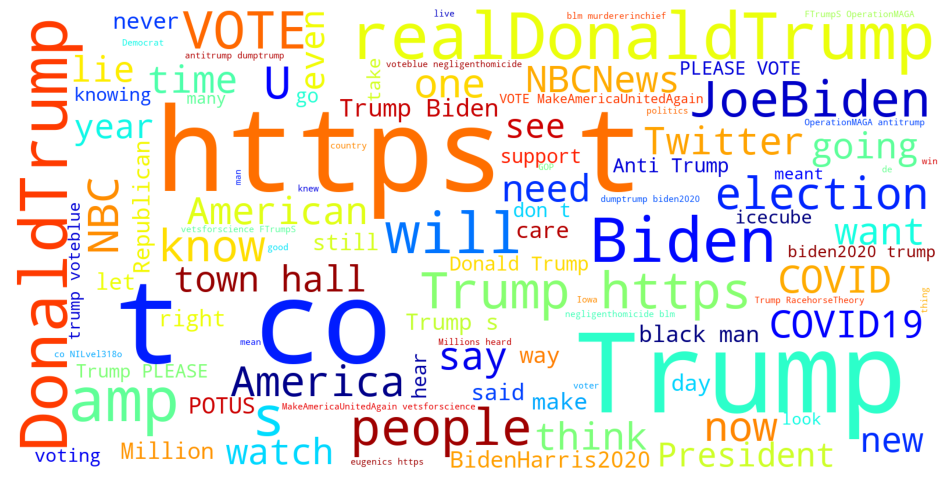

In [49]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,width=1600,height=800,max_words=100,max_font_size=200,colormap="jet").generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(trump_tweets['tweet'][:5000])

### Biden tweet Analysis 

In [50]:
biden_tweets = data[data['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US']
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...
4,#censorship #HunterBiden #Biden #BidenEmails #...
6,"In 2020, #NYPost is being #censorship #CENSORE..."
11,"FBI Allegedly Obtained Hunter Biden Computer, ..."
...,...
776861,#election #2020Elections #trump #biden https:/...
776862,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...
776865,@FLOTUS I’m excited to have a FLOTUS whose vag...
776870,The man needs some help...#usa #biden\nWhen wi...


In [51]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,islandgirlprv bradbeauregardj meidastouch bide...
4,#censorship #HunterBiden #Biden #BidenEmails #...,censorship hunterbiden biden bidenemails biden...
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",fbi allegedly obtained hunter biden computer d...


In [52]:
biden_tweets['subjectivity']=biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets.head()

,tweet,cleantext,subjectivity
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,islandgirlprv bradbeauregardj meidastouch bide...,0.000000
4,#censorship #HunterBiden #Biden #BidenEmails #...,censorship hunterbiden biden bidenemails biden...,0.000000
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",fbi allegedly obtained hunter biden computer d...,0.100000


In [53]:
biden_tweets['polarity']=biden_tweets['cleantext'].apply(getpolarity)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.00000
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,islandgirlprv bradbeauregardj meidastouch bide...,0.000000,0.00000
4,#censorship #HunterBiden #Biden #BidenEmails #...,censorship hunterbiden biden bidenemails biden...,0.000000,0.00000
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.14881
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",fbi allegedly obtained hunter biden computer d...,0.100000,-0.10000


In [54]:
biden_tweets['analysis']=biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.00000,neutral
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,islandgirlprv bradbeauregardj meidastouch bide...,0.000000,0.00000,neutral
4,#censorship #HunterBiden #Biden #BidenEmails #...,censorship hunterbiden biden bidenemails biden...,0.000000,0.00000,neutral
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.14881,negative
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",fbi allegedly obtained hunter biden computer d...,0.100000,-0.10000,negative


Text(0, 0.5, '%age of tweets')

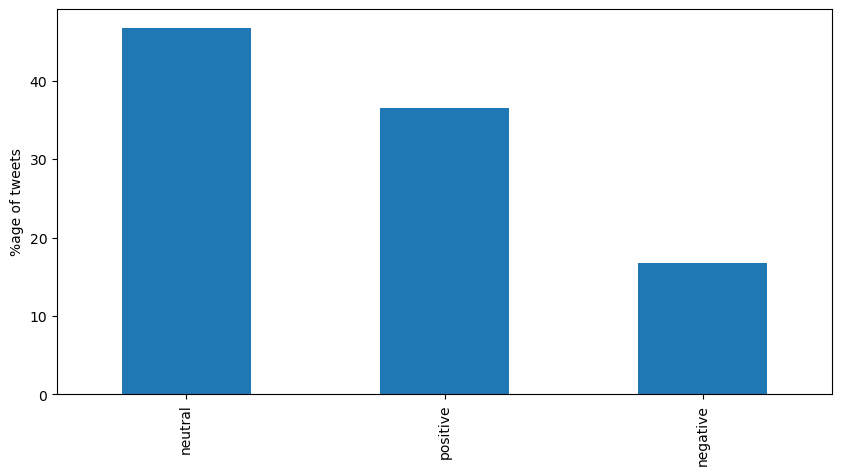

In [55]:
#how much data is positive/negetive/neutral
plt.figure(figsize=(10,5))
(biden_tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")

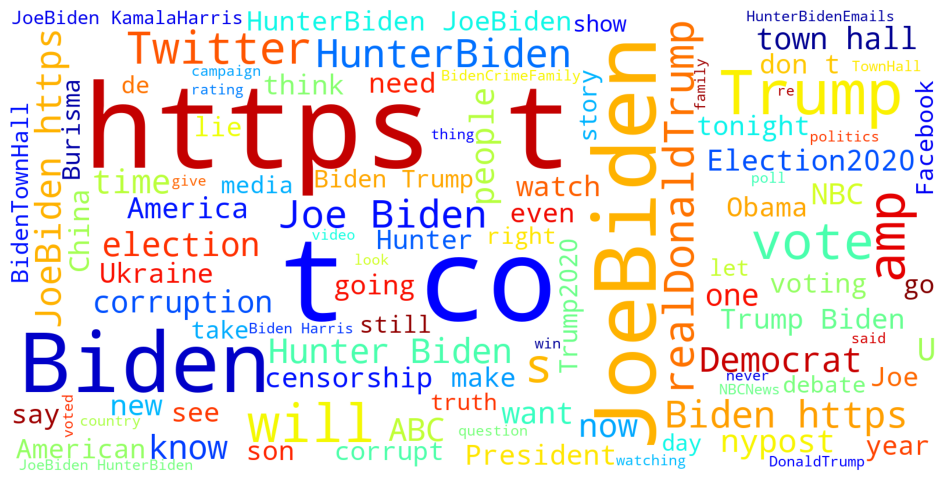

In [56]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,width=1600,height=800,max_words=100,max_font_size=200,colormap="jet").generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(biden_tweets['tweet'][:5000])

In [57]:
trump_tweets.analysis.value_counts()

neutral     92097
positive    72568
negative    48598
Name: analysis, dtype: int64

In [58]:
biden_tweets.analysis.value_counts()

neutral     84721
positive    66093
negative    30323
Name: analysis, dtype: int64

INTERPRETATION 
-with respect to US 
-excluding negetives 
  -trump has more neutral and positive comments as comapred to biden 
-although, trump has more negetive comments than biden 
-as a result, biden won the 2020 elections which is a proven fact
-overall,competition was close!